# <center>Trabajo Práctico N°1 : Reservas de Hotel</center>

**Grupo:** N°28 - The Kingdom

**Alumnos**:


*   Jurgens, Cecilia Ines
*   Schipani, Martin Sebastian
*   Soto, Marilyn Nicole

**Corrector:** Franco Mastelli

---


# 1. Analisis Exploratorio y Preprocesamiento de Datos

##**Analisis Exploratorio del dataset**

Importamos las librerias correspondientes a utilizar en el proyecto.

In [463]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Cargamos la información a un dataframe de pandas, luego creamos una copia y trabajamos con ella.

In [464]:
ds_hotel_original = pd.read_csv('hotels_train.csv')
df_hotels = ds_hotel_original.copy()

## <u>Análisis del dataset</u>

Muestra la cantidad de filas y columnas que tiene el dataset

In [465]:
print("El dataframe tiene "f"{df_hotels.shape[0]}"" filas y "f"{df_hotels.shape[1]}"" columnas.")

El dataframe tiene 61913 filas y 31 columnas.


Obtengo los nombres de las columnas/categorias del dataset y sus tipos de variables.

Chequeamos si existe alguna fila duplicada:

In [466]:
df_hotels[df_hotels.duplicated(keep=False)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled


No hay ninguna fila duplicada. Si hubiera existido, se habria eliminado del dataset.

Listar la cantidad de datos no nulos:

## <u>Analisis Univariado:</u>

###<u>Variables Cualitativas:</u>

#### Country

In [467]:
df_hotels.country.isna().sum()

221

Existen 221 valores nulos de la variable en el dataset. Analizemos el porcentaje de ellos.

In [468]:
(df_hotels.country.isna().sum()*100)/df_hotels.shape[0]

0.3569524978599002

Son pocos los valores nulos en comparacion de todos los registros. Completamos en esos campos nulos con la mas frecuente.

In [469]:
df_hotels.loc[df_hotels['country'].isnull(), 'country'] = 'PRT'


In [470]:
df_hotels.country.isna().sum()

0

#### agent

In [471]:
df_hotels.agent.isna().sum()

7890

Existen 7890 valores nulos de esta variable en el dataset. Como no existe el agent 0 previamente reemplazamos los valores faltantes por 0.

In [472]:
df_hotels.loc[df_hotels['agent'].isnull(), 'agent'] = 0
df_hotels.agent.isna().sum()
df_hotels['agent'] = df_hotels['agent'].astype(int)

In [473]:
df_hotels.agent.isna().sum()

0

#### company


In [474]:
df_hotels.company.isna().sum()

58761

Existen 58761 valores nulos de esta variable en el dataset. Se analizarán más adelante su tratamiento de los datos faltantes. Como son muchos los datos faltantes y la informacion que releva no es tan primordial para la prediccion del target, decidimos eliminar esta columna del dataset.

In [475]:
df_hotels.drop('company', axis='columns', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


###<u>Variables Cuantitativas:</u>

#### adults

In [476]:
df_hotels.adults.isna().sum()

0

In [477]:
(df_hotels['adults'] > 0).value_counts()

True     61716
False      197
Name: adults, dtype: int64

Vemos que normalmente hay entre uno y tres adultos por reservas. Son pocos casos de cero adultos y de tres o mas adultos, lo cual los podemos eliminar porque el porcentaje de registros es muy chico.

In [478]:
reservas_de_o_adultos = df_hotels[df_hotels['adults']==0]
reservas_de_o_adultos.shape[0]

197

In [479]:
reservas_de_mas_3_adultos = df_hotels[df_hotels['adults']> 3]
reservas_de_mas_3_adultos.shape[0]

41

In [480]:
print(f"Cantidad de reservas sin adultos o mas de 3 adultos a eliminar:{reservas_de_o_adultos.shape[0] + reservas_de_mas_3_adultos.shape[0]}")

Cantidad de reservas sin adultos o mas de 3 adultos a eliminar:238


In [481]:
df_hotels.drop(df_hotels[df_hotels['adults']==0].index, axis='index', inplace=True)
df_hotels.drop(df_hotels[df_hotels['adults'] > 3].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61670,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61671,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61672,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61673,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### adr

Veamos si hay filas que contienen valores incorrectos / nulos

In [482]:
df_hotels.adr.isna().sum()

0

In [483]:
(df_hotels['adr'] >= 0).value_counts()

True     61674
False        1
Name: adr, dtype: int64

Hay un valor que no es válido:. No puede haber ganacia negativa.  Eliminamos esa fila.

In [484]:
df_hotels.drop(df_hotels[df_hotels['adr']<=0].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


A partir del grafico pudimos deducir que los valores "raros" se encuentran de 400 para arriba de dias de espera.

Veamos que porcentaje tiene estos valores raros con respecto a los demas valores.

Utilizamos z-score para la ver las anomalias atipicas las nuevas observaciones .

In [485]:
#media_adr = np.mean(df_hotels.adr)
#std_adr = np.std(df_hotels.adr)
#df_hotels['z_adr'] = (df_hotels.adr - media_adr)/std_adr
#df_hotels['z_adr'] = st.zscore(df_hotels.adr)

In [486]:
#plt.hist(df_hotels.z_adr)
#plt.ylabel('frecuencia')
#plt.xlabel('z_adr')

Como el porcentaje es minimo , eliminamos las filas de esos valores raros

In [487]:
df_hotels.drop(df_hotels[df_hotels['adr']>=400].index, axis='index', inplace=True)

In [488]:
#df_hotels.drop(df_hotels[df_hotels['z_adr']>3].index, axis='index', inplace=True)
#df_hotels.drop(df_hotels[df_hotels['z_adr']<-2].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


In [489]:
#df_hotels.drop(labels='z_adr', inplace= True, axis=1)
#df_hotels.reset_index(drop=True)

#### babies

Veamos los casos borders que puedn suceder: Algun/a bebe/s tenga una reserva sin un adultos

In [490]:
df_hotels[(df_hotels['babies'] >= 1) & (df_hotels['adults'] < 1)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled


Tenemos un caso, viendo el grafico, hay reservas con 9 bebes. veamos cuantas son:

In [491]:
df_hotels[(df_hotels['babies'] >= 9)].shape[0]

1

Como solo tenemos una sola reserva, lo eliminamos.

In [492]:
df_hotels.drop(df_hotels[df_hotels['babies']>=9].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60857,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
60858,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
60859,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
60860,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### Lead_time

Analizamos la informacion de la variable lead_time

A partir del gráfico pudimos deducir que los valores "raros" se encuentran de 400 para arriba de dias de espera.

Veamos que porcentaje tiene estos valores raros con respecto a los demas valores.

In [493]:
porcentaje_valores_raros = len(df_hotels[df_hotels['lead_time'] >= 400]) * 100 / len(df_hotels.lead_time)
porcentaje_valores_raros

2.1080477145016596

Como el porcentaje es mínimo , eliminamos las filas de esos valores raros

In [494]:
df_hotels.drop(df_hotels[df_hotels['lead_time']>=400].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### children

In [495]:
df_hotels.children.isna().sum()

4

In [496]:
(df_hotels['children'] >0).value_counts()

False    55290
True      4289
Name: children, dtype: int64

In [497]:
(df_hotels['children'] < 0).value_counts()

False    59579
Name: children, dtype: int64

In [498]:
df_hotels.loc[df_hotels["children"] < 0, "children" ] = 0

La mayor cantidad de reservas fueran hechas con 0 niños, pero en el grafico se observa un valor fuera del rango que tiene como numero a 10. veamos cuantas reservas hay con ese numero de niños.

In [499]:
reservas_de_10_ninos = df_hotels[df_hotels['children']>=10]
reservas_de_10_ninos.shape[0]

1

Como la cantidad es minima, debe ser un dato mal ingresado. Por esa razon eliminamos esa reserva.

In [500]:
df_hotels.drop(df_hotels[df_hotels['children']>=10].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59573,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
59574,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
59575,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
59576,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### previous_cancellations

Analizamos la informacion de la variable previous_cancellations

Veamos si hay filas que contienen valores incorrectos / nulos

In [501]:
df_hotels.previous_cancellations.isna().sum()

0

In [502]:
(df_hotels['previous_cancellations'] >= 0).value_counts()

True    59578
Name: previous_cancellations, dtype: int64

No tiene valores nulos la columna previous_cancellations

In [503]:
df_hotels.drop(df_hotels[df_hotels['previous_cancellations']>=2].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59338,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
59339,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
59340,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
59341,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### previous_bookings_not_cancelled

In [504]:
df_hotels.drop('previous_bookings_not_canceled', axis='columns', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### days_in_waiting_list

Analizamos la informacion de la variable days_in_waiting_list:

In [505]:
df_hotels.drop(df_hotels[df_hotels['days_in_waiting_list']>=250].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


#### required_car_parking_spaces



Como vemos en el analisis anterior, hay dos valores atipicos:
+ required_car_parking_spaces: 8 ya que solo dos adultos hacen la reserva
+ required_car_parking_spaces: 3 ya que solo dos adultos hacen la reserva.

Consideramos que fueron valores mal cargados y reemplazamos esos numeros por la cantidad de adultos en esa reserva.

In [506]:
df_hotels.loc[(df_hotels['adults'] == 2) & (df_hotels['required_car_parking_spaces'] == 3), 'required_car_parking_spaces'] = 2


In [507]:
df_hotels.loc[(df_hotels['adults'] == 2) & (df_hotels['required_car_parking_spaces'] == 8), 'required_car_parking_spaces'] = 2

#### total_of_special_requests

In [508]:
df_hotels.loc[(df_hotels['total_of_special_requests'] >= 4), 'total_of_special_requests'] = 1


In [509]:
df_hotels.total_of_special_requests.value_counts().reset_index()

,index,total_of_special_requests
0,0,36720
1,1,15412
2,2,6059
3,3,1147


## Analisis Multivariado:

#### stays_in_week_nights y stays_in_weekend_nights

In [510]:
df_hotels['total_days'] = df_hotels['stays_in_week_nights'] + df_hotels['stays_in_weekend_nights']

In [511]:
df_hotels.drop(df_hotels[df_hotels['total_days'] >= 15].index, inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_days
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,3
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,1
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,1
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,7
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59101,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,2
59102,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,1
59103,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,3
59104,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,7


#### is_canceled y total_of_special_requests

#####adr and customer_type

In [512]:
df_hotels.drop(df_hotels[(df_hotels['assigned_room_type'] == 'K') & (df_hotels['adr'] > 160)].index, inplace=True)
df_hotels.drop(df_hotels[(df_hotels['assigned_room_type'] == 'I') & (df_hotels['adr'] > 210)].index, inplace=True)
df_hotels.drop(df_hotels[(df_hotels['assigned_room_type'] == 'B') & (df_hotels['adr'] > 160)].index, inplace=True)
df_hotels.drop(df_hotels[(df_hotels['assigned_room_type'] == 'B') & (df_hotels['adr'] < 30)].index, inplace=True)
df_hotels.reset_index(drop=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_days
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,3
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,0,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,1
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,1
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,7
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59030,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,No Deposit,240,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,2
59031,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,No Deposit,0,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,1
59032,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,No Deposit,0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,3
59033,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,7


#**Arboles**

###Importamos todo lo necesario para esta seccion

In [513]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import StratifiedKFold, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

###Cargamos el dataset de testeo

In [514]:
df_hotels_testeo_original = pd.read_csv('hotels_test.csv')
df_hotels_testeo = df_hotels_testeo_original.copy()

###Cargamos nuestro dataset del checkpoint anterior

In [515]:
df_hotels_arbol = df_hotels.copy()
print(f'tenememos {df_hotels_arbol.shape[0]} filas y {df_hotels_arbol.shape[1]} columnas ')

tenememos 59035 filas y 30 columnas 


###informacion del dataframe arbol

In [516]:
df_hotels_testeo.fillna({'agent': 0}, inplace=True)

In [517]:
df_hotels_testeo.isna().sum().max()

25218

In [518]:
df_hotels_arbol.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_days
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,3
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,0,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,1
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,1
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,7
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0,7


In [519]:
df_hotels_arbol.isnull()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_days
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61909,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61910,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61911,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [520]:
df_hotels_arbol.drop(df_hotels_arbol[df_hotels_arbol['children'].isna() == True].index, axis='index', inplace=True)

In [521]:
df_hotels_arbol.isna().sum()

hotel                          0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
previous_cancellations         0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
agent                          0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
id                             0
is_canceled                    0
total_days                     0
dtype: int

###Transformacion de las columnas

In [522]:
columna_elim = ['assigned_room_type', 'distribution_channel']
df_hotels_arbol.drop(columna_elim, axis=1, inplace=True)

In [523]:
meses_a_numeros ={
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July':7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df_hotels_arbol.arrival_date_month = df_hotels_arbol.arrival_date_month.map(meses_a_numeros)

In [524]:
dormitorio_letra_a_numero ={
      'A': 1,
      'B': 2,
      'C': 3,
      'D': 4,
      'E': 5,
      'F': 6,
      'G': 7,
      'H': 8,
      'I': 9,
      'K': 10,
      'L': 11,
      'P': 12
}
df_hotels_arbol.reserved_room_type = df_hotels_arbol.reserved_room_type.map(dormitorio_letra_a_numero)


In [525]:
columns_modificar = df_hotels_arbol.dtypes[(df_hotels_arbol.dtypes !='int64') & (df_hotels_arbol.dtypes !='float64')].index
columns_modificar = columns_modificar.tolist()
columns_modificar

['hotel',
 'meal',
 'country',
 'market_segment',
 'deposit_type',
 'customer_type',
 'id']

####ID

In [526]:
df_hotels_arbol.drop('id', axis= 1, inplace=True)

####One hot encoding para variables categoricas de nuestro dataset

In [527]:
columns_modificar.remove('id')

####Ahora aplicamos las modificaciones al dataset de testeo

In [528]:
columna_elim_test = ['assigned_room_type', 'distribution_channel', 'reservation_status_date']
df_hotels_testeo.drop(columna_elim_test, axis=1, inplace=True)

In [529]:
#COMPANY
df_hotels_testeo.drop('company', axis='columns', inplace=True)

#AGENT
df_hotels_testeo.loc[df_hotels_testeo['agent'].isnull(), 'agent'] = 0
df_hotels_testeo['agent'] = df_hotels_testeo['agent'].astype(int)

#COUNTRY
##Reemplazamos los valores nulos con la moda
df_hotels_testeo.loc[df_hotels_testeo['country'].isnull(), 'country'] = 'PRT'

#CHILDREN
##Eliminacion de los registros con datos nulos de esta variable:
df_hotels_testeo.loc[df_hotels_testeo['children']< 0, 'children'] =0
##Tratiento de outliers
df_hotels_testeo['children'] = df_hotels_testeo['children'].astype(int)

#ADR
##Tratamiento de Outliers:
#df_hotels_testeo.drop(df_hotels_testeo[df_hotels_testeo['adr']<=0].index, axis='index', inplace=True)

#PREVIOUS_BOOKINGS_NOT_CANCELED
df_hotels_testeo.drop('previous_bookings_not_canceled', axis='columns', inplace=True)

#STAYS_IN_WEEKEND_NIGHTS vs STAYS_IN_WEEK_NIGHTS
df_hotels_testeo['total_days'] = df_hotels_testeo['stays_in_week_nights'] + df_hotels_testeo['stays_in_weekend_nights']


In [530]:
meses_a_numeros ={
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July':7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df_hotels_testeo.arrival_date_month = df_hotels_testeo.arrival_date_month.map(meses_a_numeros)


In [531]:
dormitorio_letra_a_numero ={
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'K': 10,
    'L': 11,
    'P': 12
}
df_hotels_testeo.reserved_room_type = df_hotels_testeo.reserved_room_type.map(dormitorio_letra_a_numero)

####One hot encoding para variables categoricas para el dtaset de testeo

In [532]:
df_hotels_testeo.drop('id', axis= 1, inplace=True)

In [533]:
df_hotels_arbol.country.value_counts()

PRT    26010
GBR     5593
FRA     4732
ESP     4160
DEU     3180
       ...  
ATA        1
HND        1
MWI        1
JAM        1
RWA        1
Name: country, Length: 149, dtype: int64

In [534]:
df_hotels_testeo.country.value_counts()

PRT    12124
GBR     2387
FRA     2118
ESP     1757
DEU     1405
       ...  
MLT        1
ATF        1
TZA        1
PAK        1
NIC        1
Name: country, Length: 135, dtype: int64

In [535]:
country_testeo_list = df_hotels_testeo.country.tolist()
country_arbol_list = df_hotels_arbol.country.tolist()

In [536]:
diferencia = set(country_arbol_list).difference(set(country_testeo_list))
dif_arbol_testeo = {
    x:'PRT'
    for x in diferencia
}
dif_arbol_testeo

{'KEN': 'PRT',
 'MYT': 'PRT',
 'PYF': 'PRT',
 'PAN': 'PRT',
 'UMI': 'PRT',
 'HND': 'PRT',
 'FRO': 'PRT',
 'KNA': 'PRT',
 'SYR': 'PRT',
 'SYC': 'PRT',
 'AZE': 'PRT',
 'ETH': 'PRT',
 'VGB': 'PRT',
 'NAM': 'PRT',
 'SDN': 'PRT',
 'FJI': 'PRT',
 'CIV': 'PRT',
 'TGO': 'PRT',
 'MNE': 'PRT',
 'MUS': 'PRT',
 'ARM': 'PRT',
 'GTM': 'PRT',
 'ZMB': 'PRT',
 'COM': 'PRT',
 'BEN': 'PRT',
 'MDG': 'PRT'}

In [537]:
diferencia2 = set(country_testeo_list).difference(set(country_arbol_list))
dif_testeo_arbol = {
    x:'PRT'
    for x in diferencia2
}
dif_testeo_arbol

{'SMR': 'PRT',
 'DMA': 'PRT',
 'BFA': 'PRT',
 'UZB': 'PRT',
 'ATF': 'PRT',
 'KHM': 'PRT',
 'MLI': 'PRT',
 'ASM': 'PRT',
 'TMP': 'PRT',
 'DJI': 'PRT',
 'SLV': 'PRT',
 'NIC': 'PRT'}

In [538]:
df_hotels_arbol['country'].replace(dif_arbol_testeo, inplace=True)

In [539]:
df_hotels_testeo['country'].replace(dif_testeo_arbol, inplace=True)

In [540]:
diferencia2 = set(df_hotels_arbol.columns.tolist()).difference(set(df_hotels_testeo.columns.tolist()))
diferencia2

{'is_canceled'}

In [541]:
df_hotels_arbol = pd.get_dummies(df_hotels_arbol, columns=columns_modificar, drop_first=True)
df_hotels_arbol.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,49,2016,9,37,5,1,2,1,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1,4,2015,10,44,31,0,1,2,0.0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,2016,10,42,13,0,1,2,2.0,0,...,0,0,0,0,1,0,0,0,1,0
3,26,2016,12,51,12,2,5,2,0.0,0,...,0,0,1,0,0,1,0,0,1,0
4,104,2017,3,12,19,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,0,1


In [542]:
df_hotels_testeo = pd.get_dummies(df_hotels_testeo, columns=columns_modificar, drop_first=True)
df_hotels_testeo.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,277,2016,11,46,7,1,2,2,0,0,...,0,0,1,0,0,1,0,0,1,0
1,286,2016,5,20,11,0,4,2,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,2016,8,35,23,0,1,3,0,0,...,0,0,0,0,1,0,0,0,1,0
3,196,2016,10,44,29,2,5,2,2,0,...,0,0,0,0,1,0,0,0,1,0
4,232,2016,11,48,26,2,1,2,0,0,...,0,0,1,0,0,1,0,0,1,0


In [543]:
faltan_columnas = list(sorted(set(df_hotels_testeo.columns)- set(df_hotels_arbol.columns)))
agregar_columnas = list(sorted(set(df_hotels_arbol.columns)- set(df_hotels_testeo.columns)))

print(faltan_columnas)
print(agregar_columnas)

[]
['is_canceled']


In [544]:
df_hotels_arbol.isna().sum().max()

0

##Entrenamiento y predicción

In [545]:
ds_trabajo_x = df_hotels_arbol.drop(["is_canceled"], axis='columns', inplace=False)
ds_trabajo_y = df_hotels_arbol['is_canceled'].copy()
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, ds_trabajo_y, test_size = 0.15, random_state = 28)

In [546]:
x_train.head(2)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
15357,181,2016,5,19,5,2,4,2,0.0,0,...,0,0,0,1,0,1,0,0,1,0
53341,5,2015,9,36,1,0,2,2,0.0,0,...,0,1,0,0,0,0,0,0,1,0


In [547]:
x_test.head(2)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
1863,221,2016,8,35,26,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
29737,279,2016,10,42,12,0,3,2,0.0,0,...,0,0,0,1,0,1,0,0,1,0


In [548]:
y_train.head(2)

15357    1
53341    0
Name: is_canceled, dtype: int64

In [549]:
y_test.head(2)

1863     0
29737    1
Name: is_canceled, dtype: int64

In [550]:
from sklearn.utils.extmath import randomized_range_finder
n=40
params_grid={
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':list(range(5,45)),
    'min_samples_split':list(range(8,45)),
    'ccp_alpha':np.linspace(0, 0.0001, 15),
    'max_depth':list(range(1,35))
}

folds=5

kfoldcv=StratifiedKFold(n_splits=folds)

base_tree = DecisionTreeClassifier()

scorer_fn = make_scorer(f1_score)

randomcv = RandomizedSearchCV(estimator=base_tree, param_distributions=params_grid, scoring=scorer_fn, cv=kfoldcv, n_iter=n)
randomcv.fit(x_train, y_train)

print(randomcv.best_params_)
print(randomcv.best_score_)

{'min_samples_split': 35, 'min_samples_leaf': 9, 'max_depth': 24, 'criterion': 'gini', 'ccp_alpha': 7.857142857142858e-05}
0.845314400598659


In [551]:
tree_model= tree.DecisionTreeClassifier(criterion=randomcv.best_params_['criterion'],
                                        max_depth=randomcv.best_params_['max_depth'],
                                        min_samples_split = randomcv.best_params_['min_samples_split'],
                                        min_samples_leaf = randomcv.best_params_['min_samples_leaf'],
                                        ccp_alpha = randomcv.best_params_['ccp_alpha'])
model = tree_model.fit(x_train, y_train)

In [552]:
y_pred = model.predict(x_test)

In [553]:
df_results = pd.DataFrame(zip(y_test, y_pred), columns=['test', 'pred'])
df_results.head(10)

,test,pred
0,0,0
1,1,1
2,0,0
3,1,1
4,1,0
5,1,1
6,0,1
7,0,0
8,0,0
9,1,0


Text(50.722222222222214, 0.5, 'True')

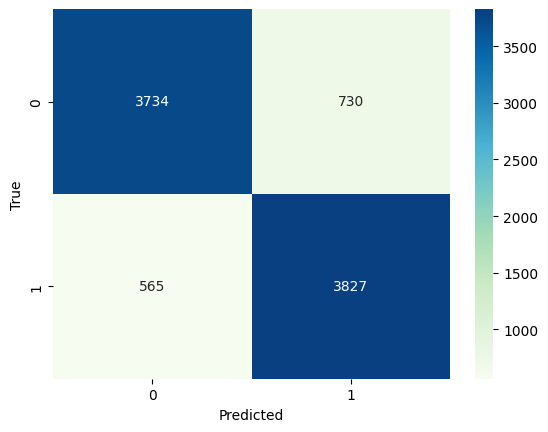

In [554]:
tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [555]:
accuracy= accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)

print('Accuracy: ' + str(accuracy))
print('Recall: ' + str(recall))
print('f1: ' + str(f1))
print('precision: ' + str(precision))

Accuracy: 0.8537714543812105
Recall: 0.8713570127504554
f1: 0.8552910939769808
precision: 0.8398068904981347


In [556]:
y_pred = model.predict(df_hotels_testeo)
df_summision = pd.DataFrame({'id':df_hotels_testeo_original['id'], 'is_canceled': y_pred })
df_summision.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [557]:
df_summision.to_csv('submit_hotels.csv', index=False)